In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df_test = pd.read_csv(r"C:\Users\jaiad.APPAUMMI\Desktop\MGC\test_data.txt", sep=":::", header=0, engine='python')

In [ ]:
df_train = pd.read_csv(r"C:\Users\jaiad.APPAUMMI\Desktop\MGC\train_data.txt", sep=":::", header=0, engine='python')

In [ ]:
df_train.columns = ['Serial_No', 'Movie_Title', 'Genre','Summary']

In [ ]:
df_test.columns = ['Serial_No', 'Movie_Title', 'Summary']

In [ ]:
df_test.head() #gives the first 5 rows of the document

In [59]:
df_train.head()

,Serial_No,Movie_Title,Genre,Summary
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [60]:
df_test.info() #gives the entire information of the document

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Serial_No    54199 non-null  int64 
 1   Movie_Title  54199 non-null  object
 2   Summary      54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Serial_No    54213 non-null  int64 
 1   Movie_Title  54213 non-null  object
 2   Genre        54213 non-null  object
 3   Summary      54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [62]:
df_train.describe() #describes the numerical informations

,Serial_No
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [65]:
df_train.isnull() #checks if the document or column has non-null values

,Serial_No,Movie_Title,Genre,Summary
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
54208,False,False,False,False
54209,False,False,False,False
54210,False,False,False,False
54211,False,False,False,False


In [66]:
df_train.isnull().sum() #sums the non-null values

Serial_No      0
Movie_Title    0
Genre          0
Summary        0
dtype: int64

In [67]:
df_test.isnull()

,Serial_No,Movie_Title,Summary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
54194,False,False,False
54195,False,False,False
54196,False,False,False
54197,False,False,False


In [68]:
df_test.isnull().sum()

Serial_No      0
Movie_Title    0
Summary        0
dtype: int64

In [69]:
df_train.count() #counts the number of rows in a document

Serial_No      54213
Movie_Title    54213
Genre          54213
Summary        54213
dtype: int64

In [70]:
df_test.count()

Serial_No      54199
Movie_Title    54199
Summary        54199
dtype: int64

In [74]:
df_train.iloc[0:6] #gives the values of the document location within a specified range

,Serial_No,Movie_Title,Genre,Summary
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
5,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...


In [77]:
df_train.loc[4] #gives the location of information in a document

Serial_No                                                      6
Movie_Title                              Quality Control (2011) 
Genre                                               documentary 
Summary         Quality Control consists of a series of 16mm ...
Name: 4, dtype: object

In [78]:
df_test.iloc[0:4]

,Serial_No,Movie_Title,Summary
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [79]:
df_test.loc[3]

Serial_No                                                      5
Movie_Title                                   Er nu zhai (1955) 
Summary         Before he was known internationally as a mart...
Name: 3, dtype: object

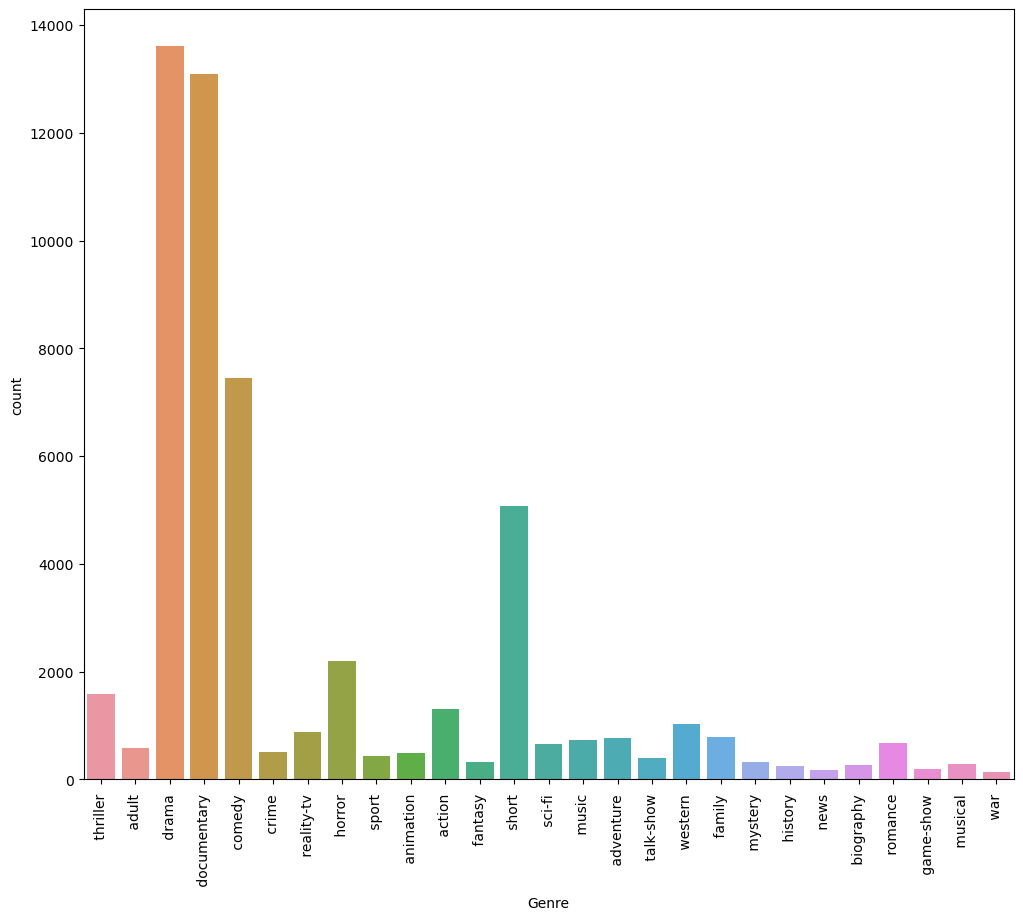

In [91]:
#visualizing train data
plt.figure(figsize=(12,10)) 
plt.xlabel ="Genre"
plt.ylabel ="Count of Genre"
plt.title = "Count of Each Genre in a Movie"
sns.countplot(x='Genre', data=df_train)
plt.xticks(rotation=90)
plt.show()

In [147]:
combined_data = pd.concat([df_train,df_test]) #combines the two data

In [163]:
combined_data

,Serial_No,Movie_Title,Genre,Summary
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
...,...,...,...,...
54194,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


In [173]:
combined_data['Genre'].fillna('Unknown', inplace = True) #inplace function wont change the original dataframe

In [174]:
combined_data

,Serial_No,Movie_Title,Genre,Summary
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
...,...,...,...,...
54194,54196,"""Tales of Light & Dark"" (2013)",Unknown,"Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),Unknown,As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),Unknown,A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),Unknown,"Popular, but mysterious rock D.J Mike Mallard..."


In [175]:
combined_data.tail()

,Serial_No,Movie_Title,Genre,Summary
54194,54196,"""Tales of Light & Dark"" (2013)",Unknown,"Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),Unknown,As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),Unknown,A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),Unknown,"Popular, but mysterious rock D.J Mike Mallard..."
54198,54200,Curitiba Zero Grau (2010),Unknown,"Curitiba is a city in movement, with rhythms ..."


In [176]:
combined_data.shape

(108412, 4)

In [178]:
combined_data.isnull().any()

Serial_No      False
Movie_Title    False
Genre          False
Summary        False
dtype: bool

In [189]:
encoder = LabelEncoder()
combined_data["Genre"] = encoder.fit_transform(combined_data["Genre"].values)

In [190]:
encoder = LabelEncoder()
combined_data["Movie_Title"] = encoder.fit_transform(combined_data["Movie_Title"].values)

In [191]:
combined_data

,Serial_No,Movie_Title,Genre,Summary
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...
...,...,...,...,...
54194,54196,10005,27,"Covering multiple genres, Tales of Light & Da..."
54195,54197,33686,27,As Alice and Cora Munro attempt to find their...
54196,54198,69188,27,A movie 169 years in the making. Oliver Twist...
54197,54199,81922,27,"Popular, but mysterious rock D.J Mike Mallard..."


In [192]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108412 entries, 0 to 54198
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Serial_No    108412 non-null  int64 
 1   Movie_Title  108412 non-null  int32 
 2   Genre        108412 non-null  int64 
 3   Summary      108412 non-null  object
dtypes: int32(1), int64(2), object(1)
memory usage: 3.7+ MB


In [194]:
combined_data.count()

Serial_No      108412
Movie_Title    108412
Genre          108412
Summary        108412
dtype: int64

In [196]:
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(combined_data["Summary"])

In [199]:
combined_data.head()

,Serial_No,Movie_Title,Genre,Summary
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [200]:
Y = combined_data["Genre"]

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
naives_model = MultinomialNB()

In [ ]:
naives_model.fit(X_train, Y_train)

In [211]:
predictions = naives_model.predict(X_test)

In [214]:
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print("Accuracy Score:", accuracy_score(Y_test, predictions))
print("r2 Score Value", r2_score(Y_test, predictions))

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0     0     0     0  

C:\Users\jaiad.APPAUMMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaiad.APPAUMMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaiad.APPAUMMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
